# 4th Preiod - Convolutional Neural Networks

In [10]:
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

from torch import tensor
import os 
import numpy as np 
import pandas as pd 
from tensorflow.keras.utils import normalize
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

from sklearn.metrics import precision_score, recall_score

## Load dataset

In [11]:
train_path = "dataset/clouds/clouds_train"
test_path = "dataset/clouds/clouds_test"

Formato original da imagem do DataLoader: torch.Size([1, 3, 128, 128])
Formato da imagem para plotagem: torch.Size([128, 128, 3])


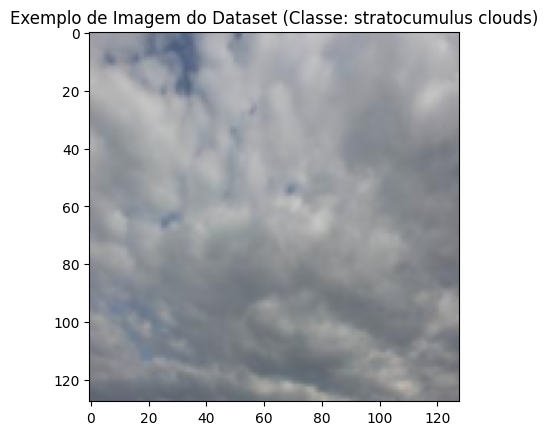

In [12]:
initial_train_transforms = transforms.Compose(
    [
        transforms.ToTensor(),         
        transforms.Resize((128, 128)),
    ]
)

dataset_train_initial = ImageFolder(
    train_path,
    transform=initial_train_transforms,
)

dataloader_train_initial = DataLoader(
    dataset_train_initial,
    shuffle=True, 
    batch_size=1,
)

image, label = next(iter(dataloader_train_initial))
print(f"Formato original da imagem do DataLoader: {image.shape}") 

image_for_plot = image.squeeze().permute(1, 2, 0)
print(f"Formato da imagem para plotagem: {image_for_plot.shape}") 

plt.imshow(image_for_plot)
plt.title(f"Exemplo de Imagem do Dataset (Classe: {dataset_train_initial.classes[label.item()]})")
plt.show()

In [13]:
train_transforms = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(45),
    transforms.RandomAutocontrast(),
    transforms.ToTensor(),
    transforms.Resize((64, 64)),
])

dataset_train = ImageFolder(
  train_path, 
  transform=train_transforms,
)

dataloader_train = DataLoader(
  dataset_train,
  shuffle=True,
  batch_size=16
)

print(f"Classes encontradas: {dataset_train.classes}")
print(f"Mapeamento classe -> índice: {dataset_train.class_to_idx}")
num_classes = len(dataset_train.classes)
print(f"Número de classes: {num_classes}")

Classes encontradas: ['cirriform clouds', 'clear sky', 'cumulonimbus clouds', 'cumulus clouds', 'high cumuliform clouds', 'stratiform clouds', 'stratocumulus clouds']
Mapeamento classe -> índice: {'cirriform clouds': 0, 'clear sky': 1, 'cumulonimbus clouds': 2, 'cumulus clouds': 3, 'high cumuliform clouds': 4, 'stratiform clouds': 5, 'stratocumulus clouds': 6}
Número de classes: 7


In [14]:
import torch
def extract(dataloader):
    X_ = []
    Y_ = []

    for images, labels in dataloader:
        X_.append(images)
        Y_.append(labels)
        
        X = torch.cat(X_, dim=0)
        Y = torch.cat(Y_, dim=0)

        X = X.numpy()
        Y = Y.numpy()
    X = np.transpose(X, (0, 2, 3, 1))
    X = normalize(X, axis=1)


    print('X shape:', X.shape)
    print('Y shape:', Y.shape)
    return X, Y

In [15]:
X_train, Y_train = extract(dataloader_train)

X shape: (474, 64, 64, 3)
Y shape: (474,)


In [16]:
model = Sequential([
    Conv2D(64, (3, 3), input_shape=X_train.shape[1:]),
    Activation("relu"),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3)),
    Activation("relu"),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3)),
    Activation("relu"),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(64),
    Activation("relu"),

    Dense(32),
    Activation("relu"),

    Dense(num_classes),
    Activation("softmax"),
])


In [17]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 62, 62, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 29, 29, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 29, 29, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_10 (Activation)      │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 7)              │           231 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_11 (Activation)      │ (None, 7)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,479 (880.78 KB)

 Trainable params: 225,479 (880.78 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="adam",
    metrics = ["accuracy"],
    
)

In [19]:
model.fit(X_train, Y_train, epochs=20, validation_split=0.3)

Epoch 1/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 116ms/step - accuracy: 0.2699 - loss: 1.9031 - val_accuracy: 0.2028 - val_loss: 1.8678
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.2531 - loss: 1.7984 - val_accuracy: 0.2308 - val_loss: 1.8850
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - accuracy: 0.3129 - loss: 1.7899 - val_accuracy: 0.2308 - val_loss: 1.8666
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.3130 - loss: 1.7888 - val_accuracy: 0.2308 - val_loss: 1.8839
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - accuracy: 0.2878 - loss: 1.8059 - val_accuracy: 0.2308 - val_loss: 1.8707
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - accuracy: 0.3148 - loss: 1.7865 - val_accuracy: 0.2308 - val_loss: 1.8750
Epoch 7/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - accuracy: 0.2680 - loss: 1.8357 - val_accuracy: 0.2308 - val_loss: 1.8836
Epoch 8/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.3239 - loss: 1.7700 - val_accuracy: 0.2308 - 

In [20]:

test_transforms = transforms.Compose([
    transforms.Resize((64, 64)), 
    transforms.ToTensor(),       
])

dataset_test = ImageFolder(
    test_path,
    transform=test_transforms,
)

dataloader_test = DataLoader(
    dataset_test,
    shuffle=False, 
    batch_size=16  
)

print(f"Número de amostras no conjunto de teste: {len(dataset_test)}")
print(f"Classes no conjunto de teste: {dataset_test.classes}")

Número de amostras no conjunto de teste: 486
Classes no conjunto de teste: ['cirriform clouds', 'clear sky', 'cumulonimbus clouds', 'cumulus clouds', 'high cumuliform clouds', 'stratiform clouds', 'stratocumulus clouds']


In [21]:
X_test, Y_test = extract(dataloader_test)

X shape: (486, 64, 64, 3)
Y shape: (486,)


In [22]:
test_loss, test_accuracy = model.evaluate(X_test, Y_test)

print(f"Test Loss on {len(X_test)} test samples: {test_loss}")
print(f"Test Accuracy on {len(X_test)} test samples: {test_accuracy}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.2301 - loss: 1.6179
Test Loss on 486 test samples: 1.616919755935669
Test Accuracy on 486 test samples: 0.2736625373363495


In [ ]:
predictions = np.argmax(model.predict(X_test), axis=1)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step


In [24]:
predictions

array([3, 3, 3, 4, 4, 3, 3, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 4, 3, 4, 3, 3,
       3, 3, 3, 3, 4, 4, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 4, 3, 2, 3, 3,
       3, 2, 2, 2, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 2, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 4, 4, 4, 3, 3, 4, 4, 4, 4, 3, 4,
       4, 3, 4, 3, 3, 3, 4, 4, 3, 4, 3, 4, 3, 3, 3, 4, 4, 3, 4, 4, 3, 4,
       4, 3, 4, 3, 3, 4, 4, 3, 4, 4, 3, 4, 3, 3, 3, 4, 3, 4, 4, 4, 3, 4,
       4, 3, 3, 3, 4, 3, 4, 3, 3, 3, 2, 2, 3, 3, 3, 2, 3, 2, 2, 3, 2, 3,
       3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 4, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2,
       3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 4, 3, 4, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 2, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 4, 4, 3, 3, 3, 3,
       3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3,

In [25]:
predicted_labels = [dataset_train.classes[idx] for idx in predictions]

In [26]:
predicted_labels

['cumulus clouds',
 'cumulus clouds',
 'cumulus clouds',
 'high cumuliform clouds',
 'high cumuliform clouds',
 'cumulus clouds',
 'cumulus clouds',
 'cumulus clouds',
 'cumulus clouds',
 'cumulonimbus clouds',
 'cumulus clouds',
 'cumulus clouds',
 'cumulus clouds',
 'cumulonimbus clouds',
 'cumulus clouds',
 'cumulus clouds',
 'cumulus clouds',
 'high cumuliform clouds',
 'cumulus clouds',
 'high cumuliform clouds',
 'cumulus clouds',
 'cumulus clouds',
 'cumulus clouds',
 'cumulus clouds',
 'cumulus clouds',
 'cumulus clouds',
 'high cumuliform clouds',
 'high cumuliform clouds',
 'cumulus clouds',
 'cumulus clouds',
 'cumulus clouds',
 'cumulus clouds',
 'cumulus clouds',
 'cumulus clouds',
 'cumulonimbus clouds',
 'cumulus clouds',
 'cumulus clouds',
 'cumulus clouds',
 'cumulus clouds',
 'high cumuliform clouds',
 'cumulus clouds',
 'cumulonimbus clouds',
 'cumulus clouds',
 'cumulus clouds',
 'cumulus clouds',
 'cumulonimbus clouds',
 'cumulonimbus clouds',
 'cumulonimbus clouds